In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
    
paths = [f.path for f in os.scandir('target/criterion/') if f.is_dir()]
paths.remove('target/criterion/report')

report = {}

for path in paths:
    path_end = path.split('/')[-1].split(' ')
    function_name = path_end[0]
        
    size_paths = [f.path for f in os.scandir(path) if f.is_dir() and not f.path.endswith('report')]
        
    for size_path in size_paths:
        size = int(size_path.split('/')[-1])
        with open(os.path.join(size_path, 'base', 'estimates.json'), 'r') as f:
            data = json.load(f)
            
            if function_name not in report:
                report[function_name] = {}
                            
            report[function_name][size] = data['median']['point_estimate']
        

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df = pd.DataFrame(report)
df

,cost_filter,cost_nft_transfer,cost_create_var,cost_analysis_iterable_func,cost_fold,cost_analysis_check_let,cost_analysis_type_lookup,cost_secp256k1recover,cost_contract_storage,cost_index_of,cost_user_function_application,cost_ft_balance,cost_trait_checker,cost_create_ft,cost_analysis_get_function_entry,cost_nft_owner,cost_nft_mint,cost_fetch_var,cost_nft_burn,cost_unwrap_err,cost_stx_balance,cost_le,cost_type_parse_step,cost_contract_of,cost_inner_type_check_cost,cost_eq,cost_hash160,cost_some_cons,cost_as_max_len,cost_analysis_type_check,cost_analysis_lookup_variable_const,cost_if,cost_ft_get_supply,cost_analysis_check_tuple_merge,cost_is_okay,cost_leq,cost_unwrap_err_or_ret,cost_mul,cost_analysis_type_annotate,cost_analysis_tuple_items_check,cost_keccak256,cost_int_cast,cost_at_block,cost_analysis_use_trait_entry,cost_fetch_entry,cost_tuple_cons,cost_asserts,cost_div,cost_default_to,cost_not,cost_lookup_function,cost_analysis_check_tuple_get,cost_create_nft,cost_principal_of,cost_contract_call,poison_microblock,cost_pow,cost_sha256,cost_unwrap_ret,cost_ast_parse,cost_analysis_check_tuple_cons,cost_load_contract,cost_xor,cost_tuple_merge,cost_mod,cost_analysis_lookup_function_types,cost_analysis_lookup_variable_depth,cost_append,cost_geq,cost_is_err,cost_print,cost_analysis_list_items_check,cost_try_ret,cost_lookup_variable_size,cost_sha512t256,cost_analysis_option_cons,cost_set_var,cost_analysis_bind_name,cost_log2,cost_analysis_visit,cost_or,cost_match,cost_ft_transfer,cost_begin,cost_secp256k1verify,cost_type_checker,cost_read_only,cost_analysis_lookup_function,cost_concat,cost_ft_mint,cost_err_cons,cost_set_entry,cost_len,cost_ast_cycle_detection,cost_ft_burn,cost_analysis_storage,cost_ge,cost_lookup_variable_depth,cost_is_some,cost_sqrti,cost_list_cons,cost_analysis_option_check,cost_let,cost_ok_cons,cost_sha512,cost_map,cost_bind_name,cost_block_info,cost_unwrap,cost_and,cost_add,cost_is_none,cost_stx_transfer,cost_arithmetic_only_checker,cost_tuple_get,cost_element_at,cost_create_map,cost_sub
1,208160.338605,2.624805e+05,9.070061e+05,4777.168260,210815.425692,5394.610315,5035.314341,6.491736e+06,3.493387e+06,244168.176398,1.029834e+04,245220.927792,NaN,NaN,NaN,2.677268e+05,2.642778e+05,NaN,2.457998e+05,125379.245964,633330.831731,NaN,2295.343141,5.961363e+06,10242.222807,69121.522092,NaN,NaN,257863.421263,2.823301e+03,6876.133795,86060.033934,214393.227778,2.976155e+04,138268.555076,NaN,136087.071775,74260.346679,2583.972247,27714.752150,NaN,74042.5214,93968.051497,NaN,NaN,1.009309e+05,70001.809338,74347.396104,120482.45882,74434.265797,NaN,332.717721,6.671791e+05,NaN,69803.859518,13353338.5,NaN,NaN,152980.818669,126204446.0,7.074769e+03,NaN,NaN,1.942365e+05,NaN,NaN,7951.513674,1.096061e+05,NaN,116823.444717,NaN,2857.568463,124466.625,5231.513761,NaN,2600.630496,NaN,56806.984778,71709.314927,279.809926,67996.139947,136388.336085,250932.551683,NaN,6.099189e+06,NaN,NaN,NaN,1.418218e+05,736448.177989,NaN,NaN,219172.706616,7.675225e+04,267678.510272,NaN,NaN,8135.391892,99402.818923,75099.680556,7.998306e+04,1536.589846,1.231868e+05,NaN,NaN,1.676315e+06,117812.504464,2174855.5,128630.299749,68989.014760,73649.154931,102601.985239,654001.240741,NaN,5.558181e+04,222230.209265,NaN,73478.293036
32,NaN,4.542190e+05,1.097497e+06,41489.584239,NaN,32920.112932,20148.359853,NaN,3.782382e+06,NaN,3.579962e+05,NaN,NaN,NaN,NaN,4.334269e+05,4.364433e+05,NaN,4.364971e+05,NaN,NaN,NaN,NaN,NaN,43747.058838,195146.179211,NaN,NaN,NaN,2.241794e+05,NaN,NaN,NaN,5.092064e+05,NaN,NaN,NaN,NaN,32206.310851,51557.702128,NaN,NaN,NaN,NaN,8.046751e+05,9.675274e+05,NaN,NaN,NaN,NaN,NaN,4589.008170,7.565425e+05,NaN,NaN,NaN,NaN,NaN,NaN,132228659.0,2.663816e+05,NaN,NaN,2.825592e+06,NaN,NaN,46630.543269,4.994525e+05,NaN,NaN,NaN,27780.373493,NaN,33718.762545,NaN,NaN,NaN,98470.284499,NaN,NaN,114603.951055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.733185e+05,NaN,NaN,NaN,NaN,2.060260e+06,NaN,72843.690957,NaN,46620.610450,NaN,NaN,3.146847e+05,NaN,1.570427e+06,NaN,NaN,1.8201

In [3]:
def estimate_params(df, name, transform):
    X = df.index.values.reshape(-1, 1)
    Y = df[name].values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))].reshape(-1, 1)
    Y = Y[np.logical_not(np.isnan(Y))]
    X = transform(X)
#     Y = transform(Y)

    linear_regressor = LinearRegression()
    linear_regressor.fit(X, Y)
    Y_pred = linear_regressor.predict(X)
    
    b = linear_regressor.intercept_
    if b < 0:
        b = max(Y[0] - linear_regressor.coef_, 0)
    a = linear_regressor.coef_
    
    return (a, b)
    
def logn(n):
    return np.log2(n)

def nlogn(n):
    return n * np.log2(n)

def plot(df, name, a, b, transform):
    Y = df[name].values.reshape(-1, 1)
    X = df.index.values.reshape(-1, 1)
    X = X[np.logical_not(np.isnan(Y))]
    X = transform(X)
    Y = Y[np.logical_not(np.isnan(Y))]
    
    y_pred = a*X + b
    
    plt.scatter(X, Y, color='orange')
    plt.suptitle(name)
    plt.plot(X, y_pred, color='blue')
    plt.show()

def estimate_plot(df, fun_name, output, transform = lambda x: x):
    a, b = estimate_params(df, fun_name, transform)
    print(a, b)
#     output.loc[fun_name] = [a.squeeze(), b.squeeze()]
    if not isinstance(a, int):
        a = a.squeeze()
    if not isinstance(b, int):
        b = b.squeeze()
    output.loc[fun_name] = [a, b]
    plot(df, fun_name, a, b, transform)

[840.86102115] 4436.2710773780855


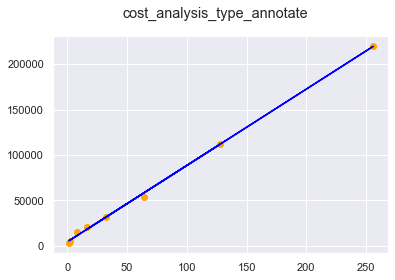

[51512.62415366] 0


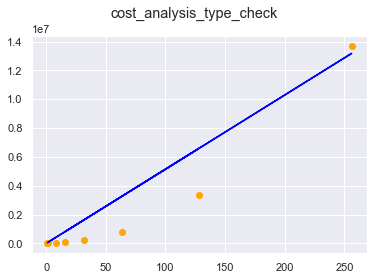

[685.33580914] 2598.417964492437


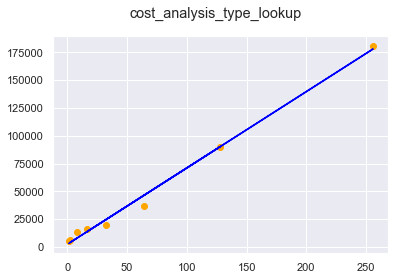

[0.] 279.8099257570268


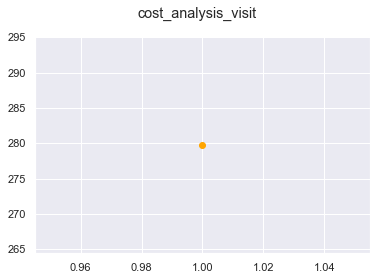

[1022.91425232] 5435.77943501695


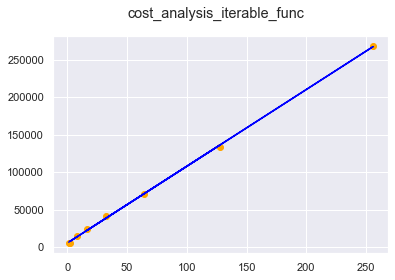

[0.] 2600.630495500648


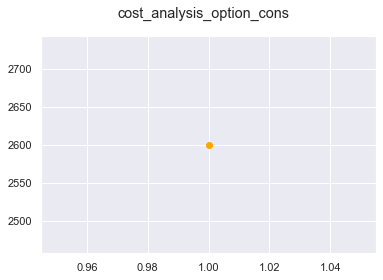

[0.] 1536.5898458131016


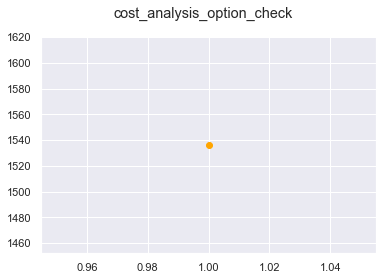

[1019.83134043] 68971.15268254884


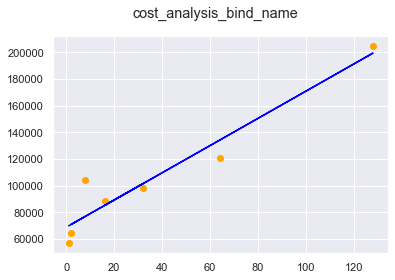

[892.90191415] 5386.804431074415


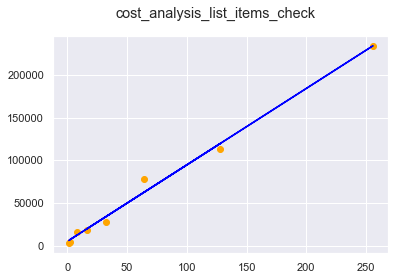

[18.14750695] 1210.977725747368


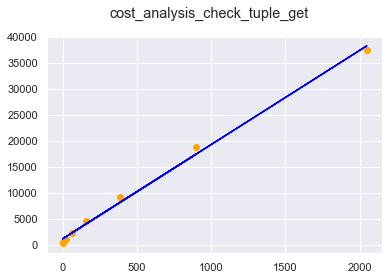

[1196.5470784] 50951.98975745728


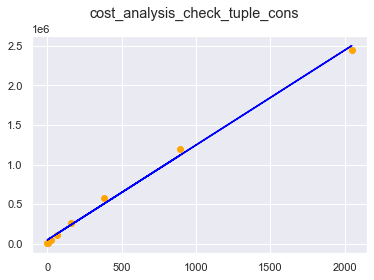

[927.89784862] 27531.15300512166


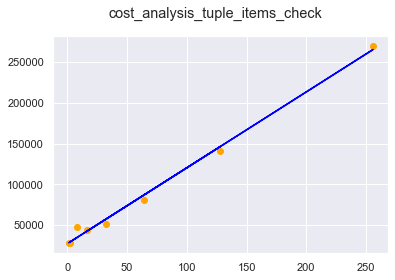

[838.40282692] 4693.97723893651


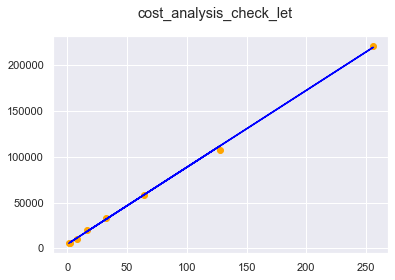

[0.] 7795.035473881313


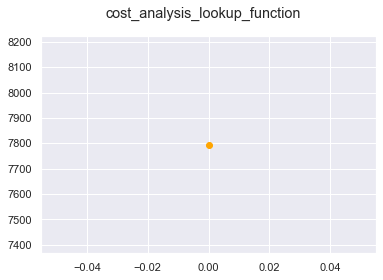

[758.03545333] 12402.872723298737


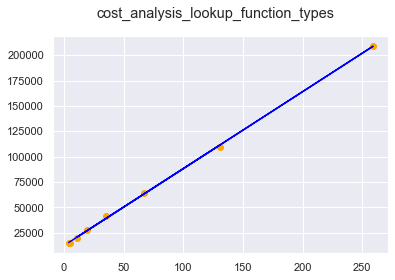

[0.] 6876.133794855095


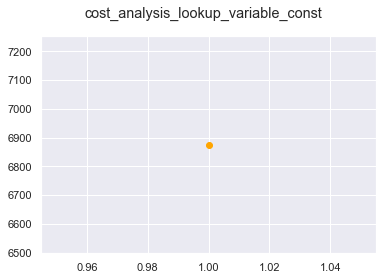

[166.83214079] 14725.27330483601


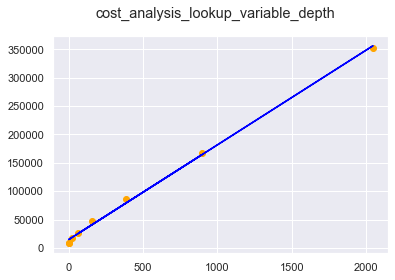

[137.63827117] [226269.96379204]


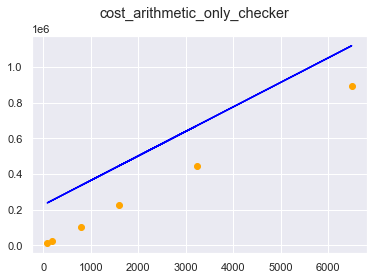

[391.38184599] [2204429.61815401]


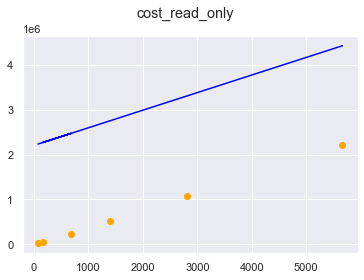

[37314.09192904] [19418127.90807096]


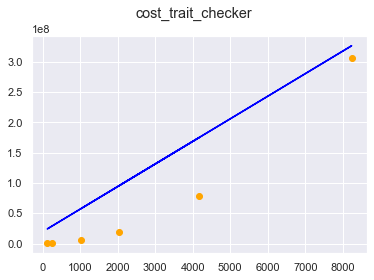

[26451.86930006] [822020.26909777]


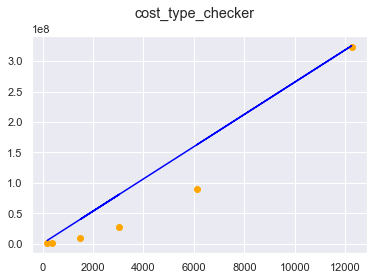

[80863.54555062] 128662814.80072917


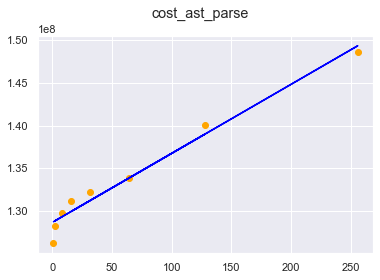

[63233.50030024] 40710.653672178276


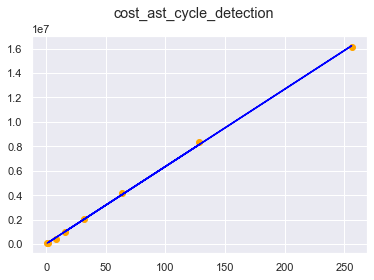

[878.80977416] 41912.75921549491


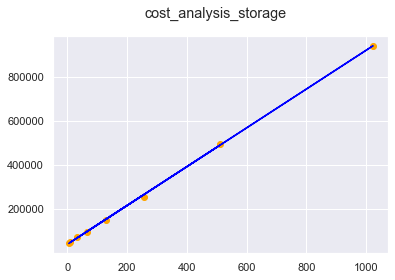

[4590.51424332] 327452.2750967239


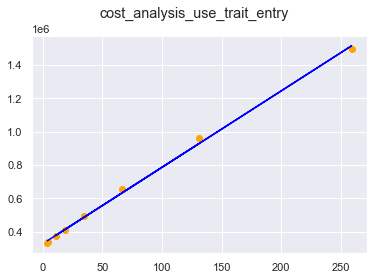

[36331.08682282] 622355.3408414358


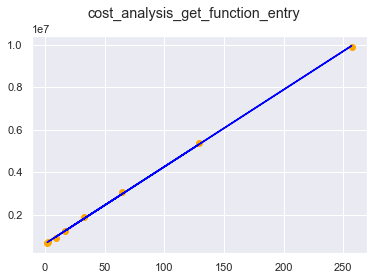

[1260.09101513] 6474.129717144184


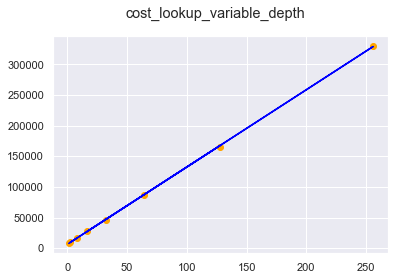

[1057.55496287] 430.71709407186427


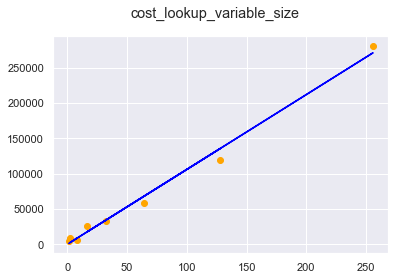

[0.] 7252.732431364687


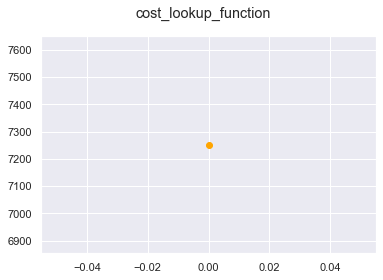

[0.] 117812.50446428571


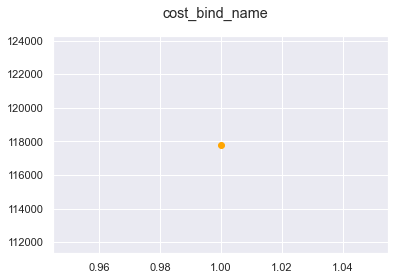

[1243.46634836] 4982.793958075374


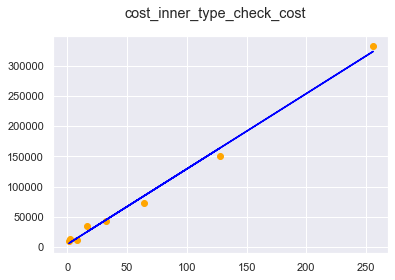

[12059.6122739] 0


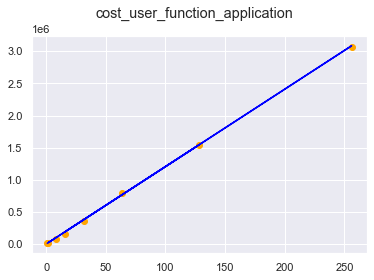

[49643.08276219] 28271.813141238876


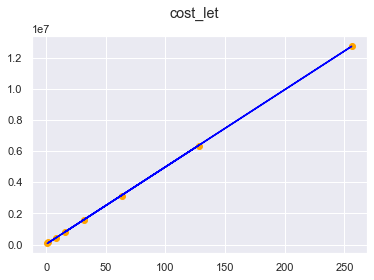

[0.] 86060.03393393394


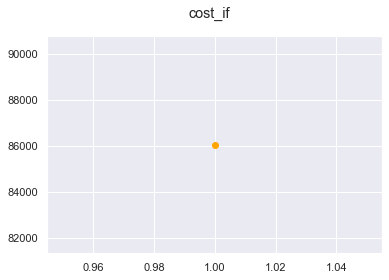

[0.] 70001.80933839409


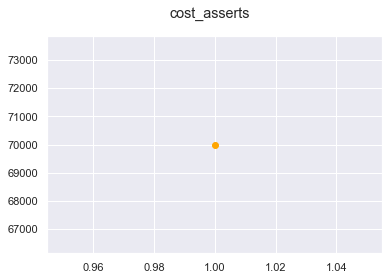

[523283.32725692] 1350475.0347818546


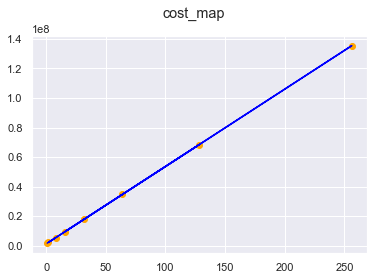

[0.] 208160.33860548577


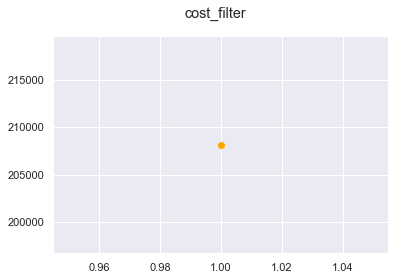

[0.] 219172.7066162041


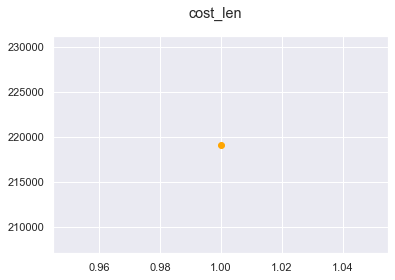

[0.] 222230.2092653509


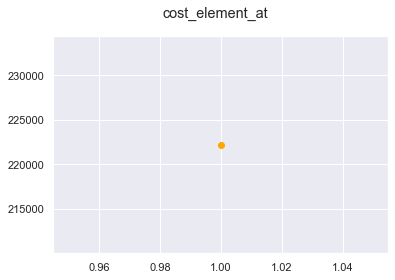

[0.] 244168.17639751552


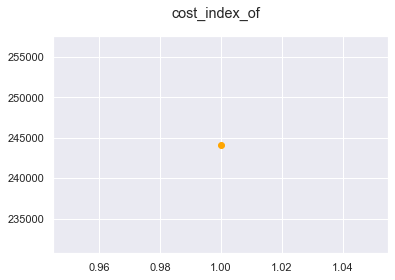

[0.] 210815.4256916996


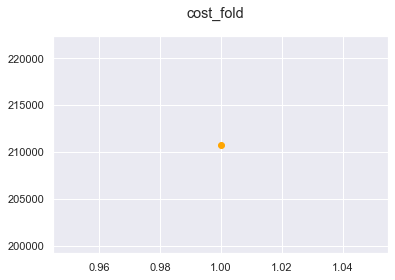

[6659.64450791] 88461.87062594516


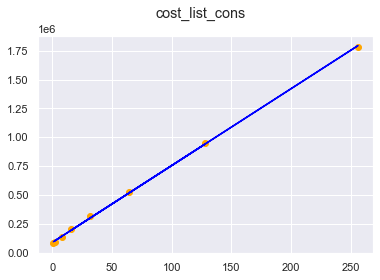

[0.] 2295.343140757893


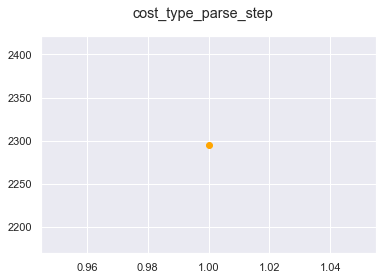

[1950.28663369] 837453.6549378242


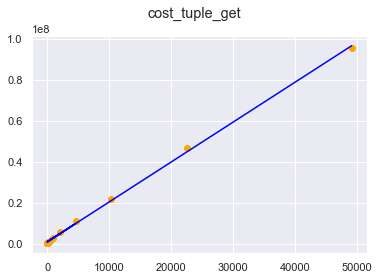

[95121.90551131] [99114.61253309]


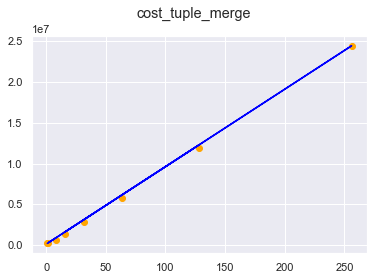

[5054.76087105] 826326.4414771572


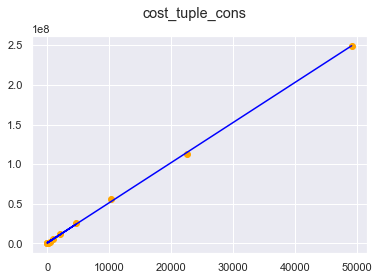

[4948.94612424] 69343.85868228035


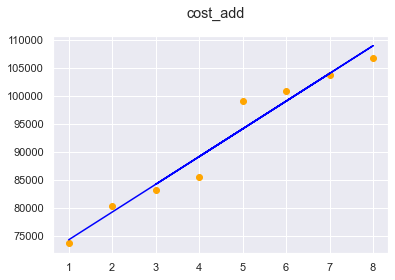

[5117.68489466] 69094.79453413413


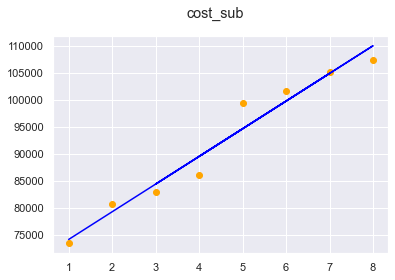

[5621.70680718] 69246.16042296473


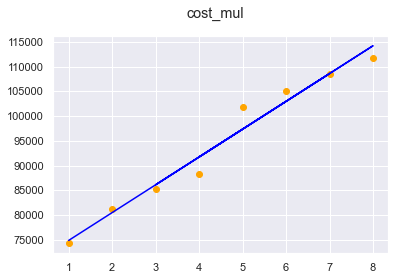

[5947.10331505] 68685.17860931632


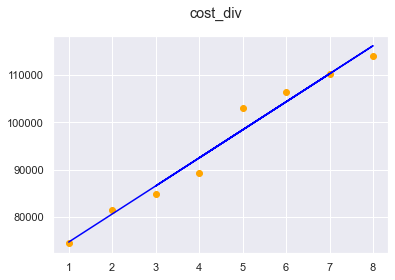

[0.] 73839.13696303696


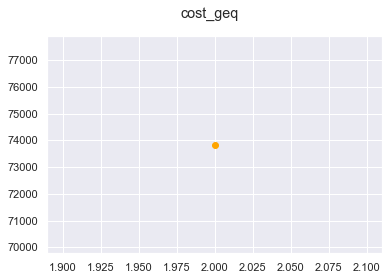

[0.] 73737.61273339123


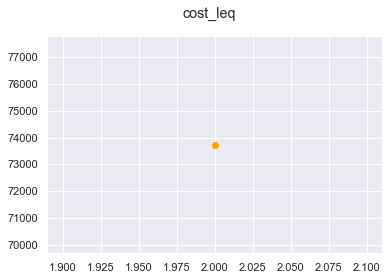

[0.] 69277.64360902255


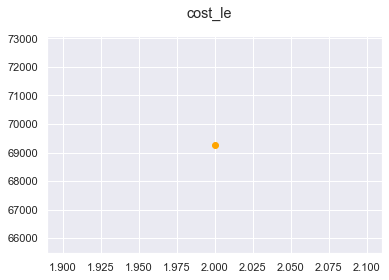

[0.] 69535.62153790088


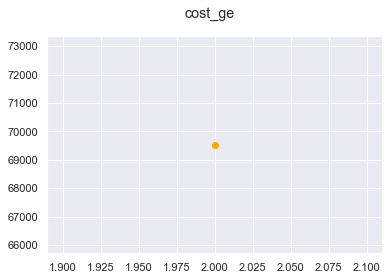

[0.] 74042.52139965298


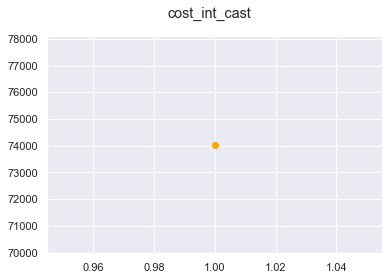

[0.] 74576.5205026455


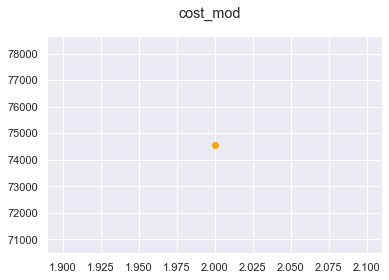

[0.] 75496.86344537814


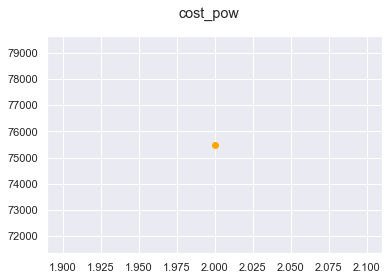

[0.] 75099.68055555556


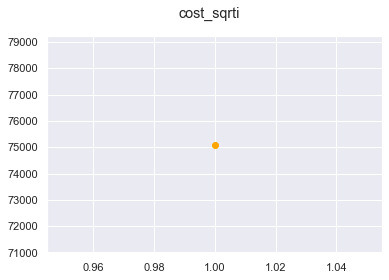

[0.] 71709.31492673993


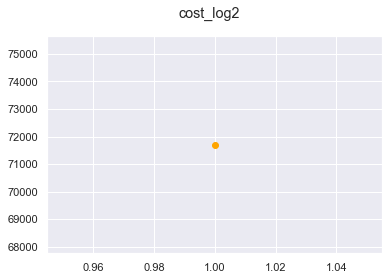

[0.] 73877.10162337663


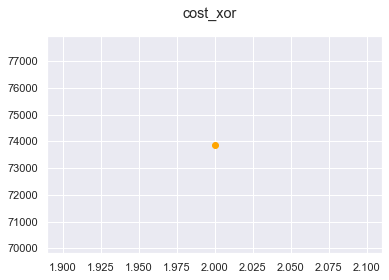

[0.] 74434.26579670329


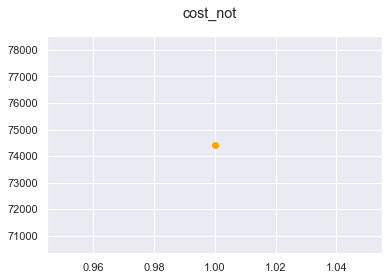

[3352.35326575] 79258.58544001554


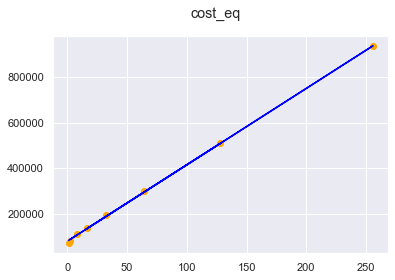

[0.] 89817.91365777081


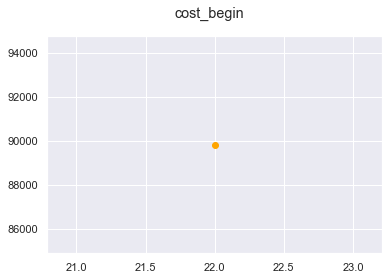

[219.9723034] 115766.26326790452


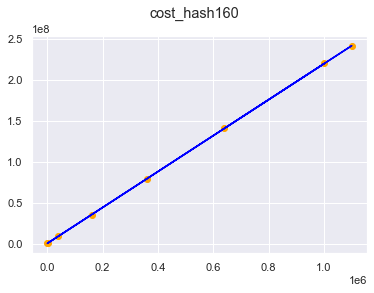

[220.15280321] 38013.40299682319


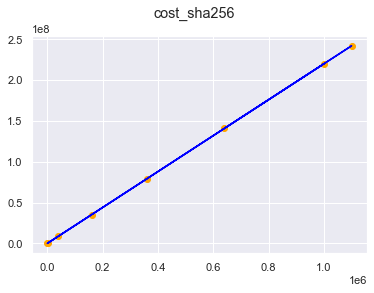

[106.76750632] 86037.55594724417


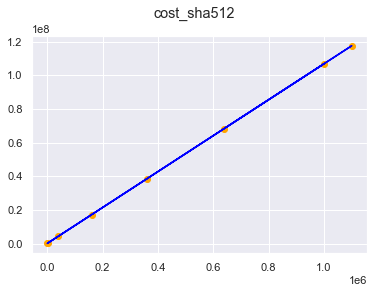

[106.77993849] 59700.34432786703


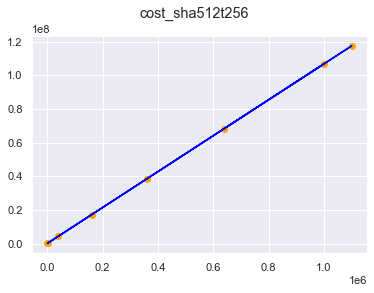

[140.57252502] 90196.36159357429


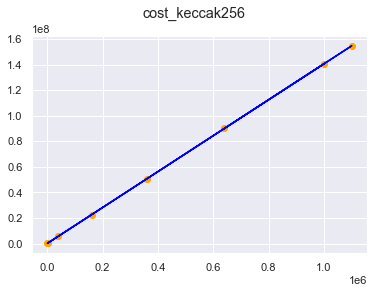

[0.] 6491736.1875


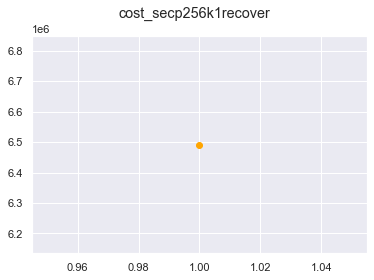

[0.] 6099189.333333333


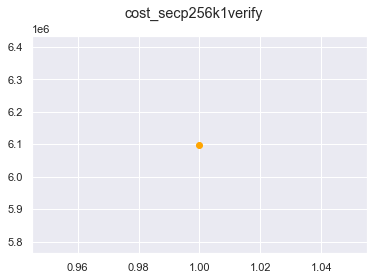

[1715.69085868] [1310831.35812182]


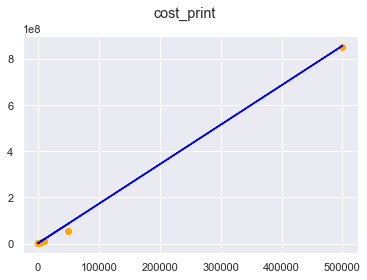

[0.] 91099.79286341678


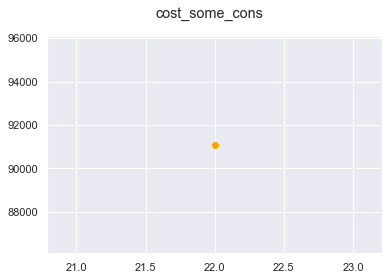

[0.] 84563.34490740742


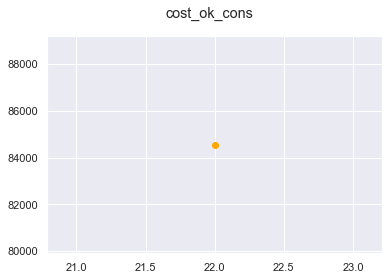

[0.] 96814.96893859564


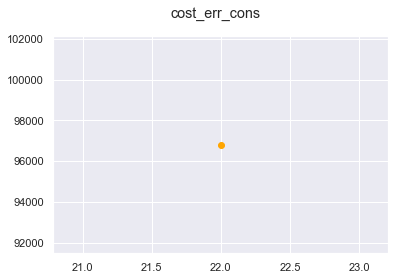

[0.] 120482.4588196536


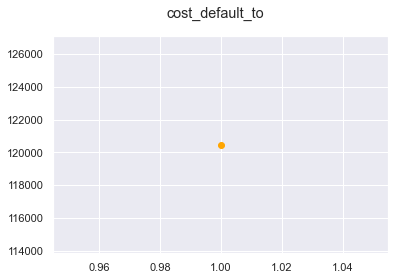

[0.] 152980.81866883117


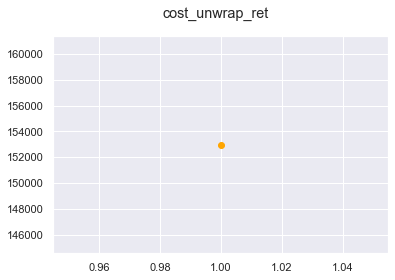

[0.] 136087.07177513497


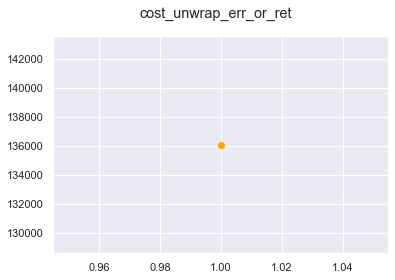

[0.] 138268.555076244


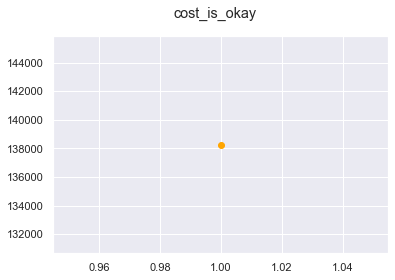

[0.] 102601.9852393617


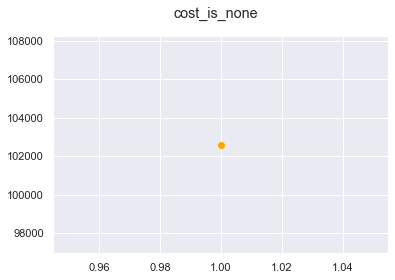

[0.] 116823.4447167756


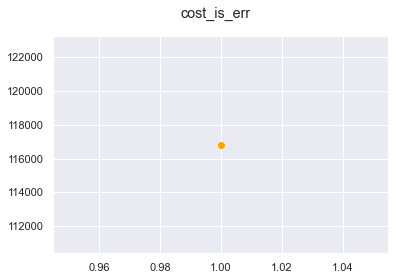

[0.] 99402.8189232753


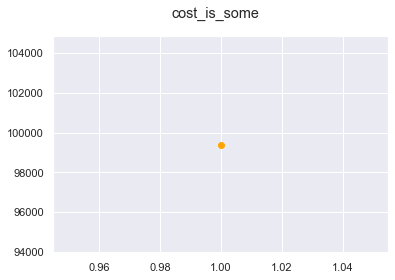

[0.] 128630.29974856321


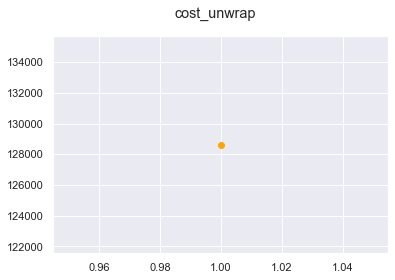

[0.] 125379.24596354167


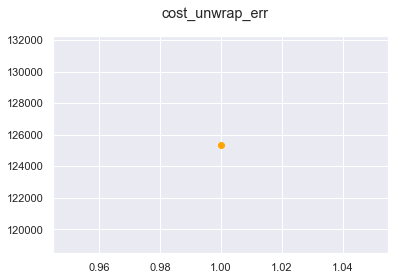

[0.] 124466.625


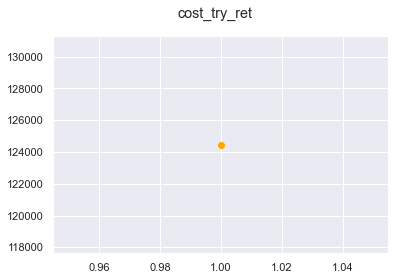

[0.] 136388.33608541306


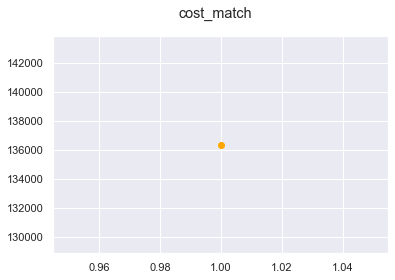

[1559.46702795] 67174.45095900548


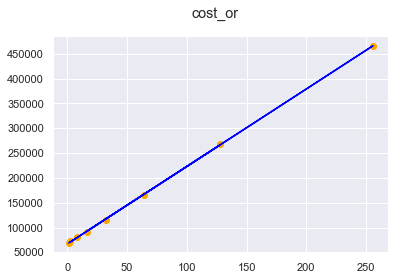

[1553.39515053] 66381.80258568285


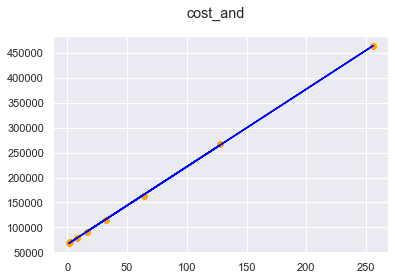

[31575.24061484] [78030.84649508]


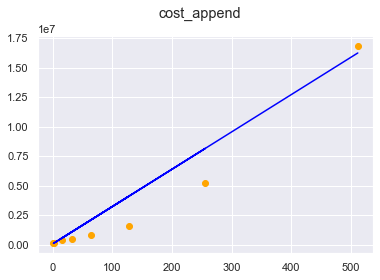

[34872.77199993] [106949.05473752]


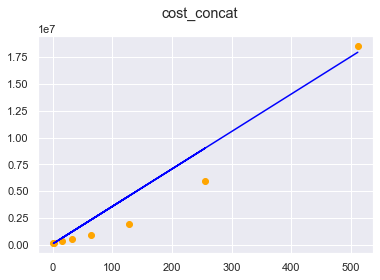

[0.] 257863.42126346205


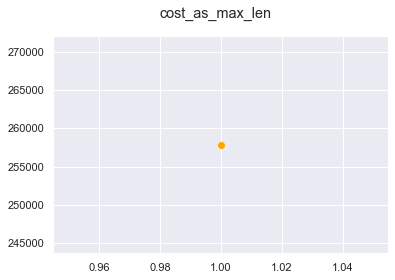

[0.] 69803.85951808607


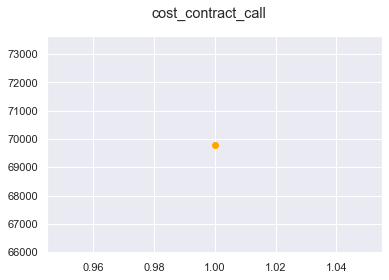

[0.] 5961363.3125


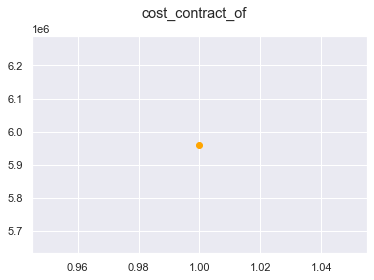

[0.] 7890.588161038961


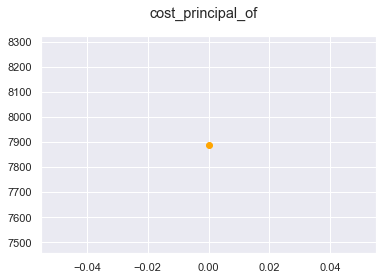

[0.] 93968.05149711401


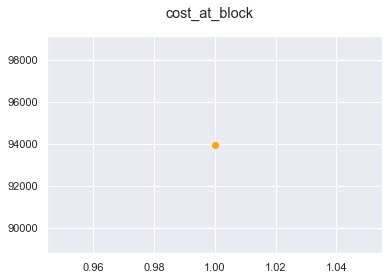

[131.83430526] [6183.98642406]


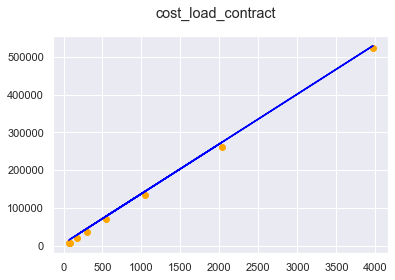

[768.82958255] 725826.6765027742


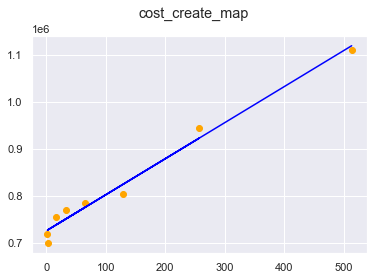

[3567.96512081] 962546.1318675904


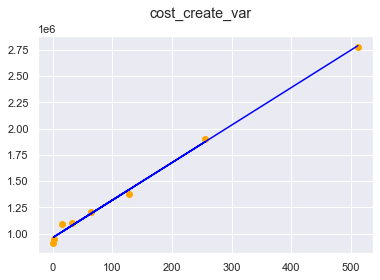

[1020.01631867] 702878.1826742113


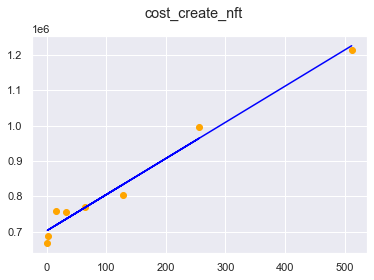

[0.] 868795.361377709


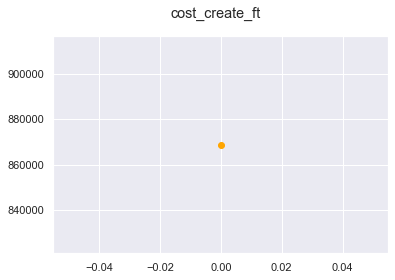

[226.73164762] 1394199.3975367993


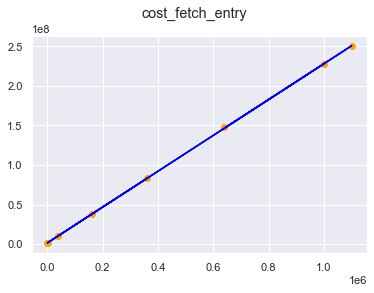

[1906.88353704] [2962583.20469826]


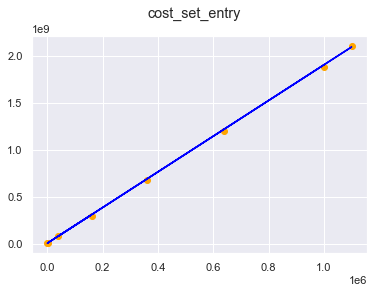

[581.41526103] [844916.29761127]


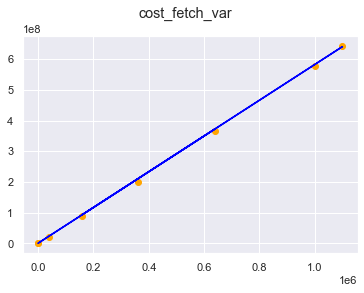

[2303.41457251] [2707837.62709416]


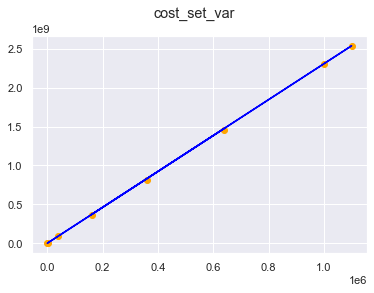

[5995.58802808] 3665780.562472733


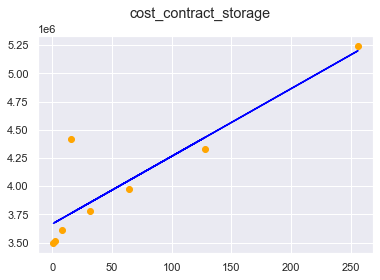

[0.] 2174855.5


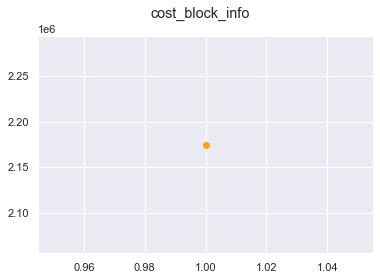

[0.] 633330.8317307692


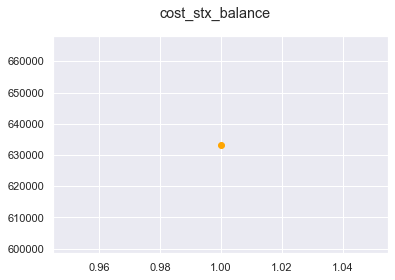

[0.] 654001.2407407407


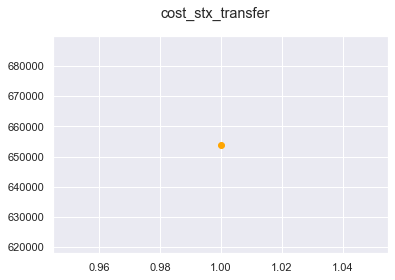

[0.] 736448.1779891304


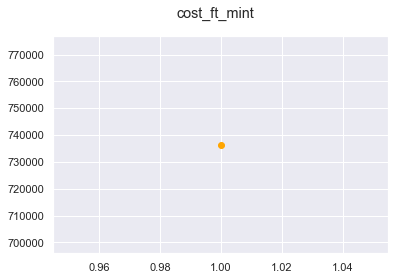

[0.] 250932.5516826923


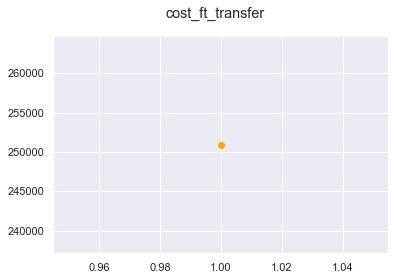

[0.] 245220.92779156327


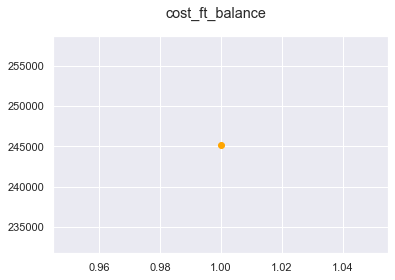

[4342.22727019] 274970.6463221881


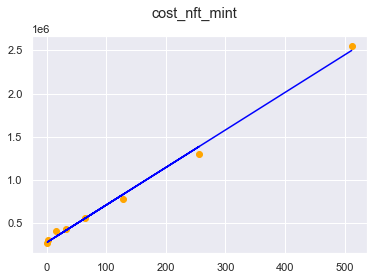

[4077.40992854] 287883.4850600682


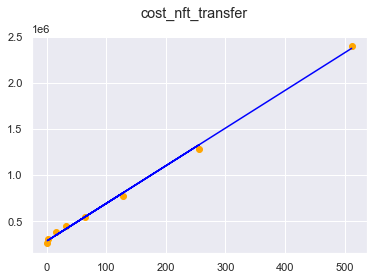

[4566.50662409] 337389.9465378928


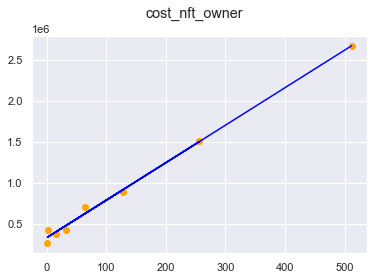

[0.] 214393.22777777776


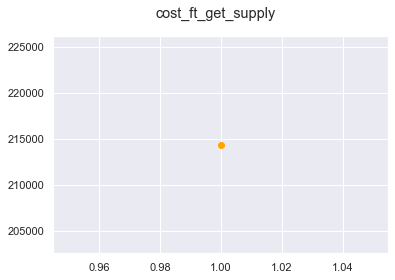

[0.] 267678.51027199073


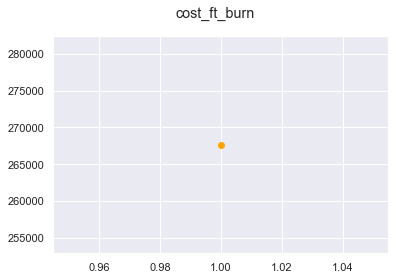

[4179.46998413] 269210.0949366125


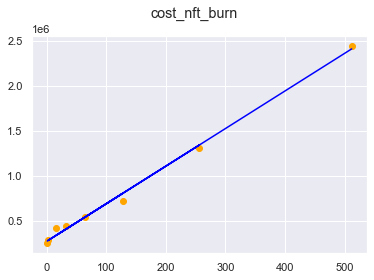

[0.] 13353338.5


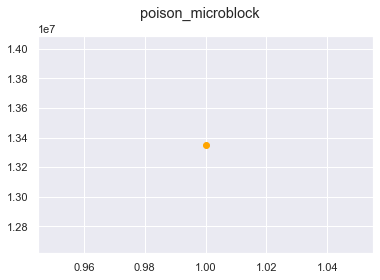

,a,b
cost_analysis_type_annotate,840.8610211456045,4436.271077
cost_analysis_type_check,51512.62415365942,0.0
cost_analysis_type_lookup,685.3358091364507,2598.417964
cost_analysis_visit,0.0,279.809926
cost_analysis_iterable_func,1022.9142523218795,5435.779435
cost_analysis_option_cons,0.0,2600.630496
cost_analysis_option_check,0.0,1536.589846
cost_analysis_bind_name,1019.8313404317717,68971.152683
cost_analysis_list_items_check,892.9019141518313,5386.804431
cost_analysis_check_tuple_get,18.14750695388955,1210.977726


In [4]:
output = pd.DataFrame(columns=["a", "b"])

estimate_plot(df, 'cost_analysis_type_annotate', output)
estimate_plot(df, 'cost_analysis_type_check', output)
estimate_plot(df, 'cost_analysis_type_lookup', output)
estimate_plot(df, 'cost_analysis_visit', output)
estimate_plot(df, 'cost_analysis_iterable_func', output)
estimate_plot(df, 'cost_analysis_option_cons', output)
estimate_plot(df, 'cost_analysis_option_check', output)
estimate_plot(df, 'cost_analysis_bind_name', output)
estimate_plot(df, 'cost_analysis_list_items_check', output)
estimate_plot(df, 'cost_analysis_check_tuple_get', output, nlogn)
# estimate_plot(df, 'cost_analysis_check_tuple_merge ', output)
estimate_plot(df, 'cost_analysis_check_tuple_cons', output, nlogn)
estimate_plot(df, 'cost_analysis_tuple_items_check', output)
estimate_plot(df, 'cost_analysis_check_let', output)
estimate_plot(df, 'cost_analysis_lookup_function', output)
estimate_plot(df, 'cost_analysis_lookup_function_types', output)
estimate_plot(df, 'cost_analysis_lookup_variable_const', output)
estimate_plot(df, 'cost_analysis_lookup_variable_depth', output, nlogn)
estimate_plot(df, 'cost_arithmetic_only_checker', output)
estimate_plot(df, 'cost_read_only', output)
estimate_plot(df, 'cost_trait_checker', output)
estimate_plot(df, 'cost_type_checker', output)
estimate_plot(df, 'cost_ast_parse', output)
estimate_plot(df, 'cost_ast_cycle_detection', output)
estimate_plot(df, 'cost_analysis_storage', output)
estimate_plot(df, 'cost_analysis_use_trait_entry', output)
estimate_plot(df, 'cost_analysis_get_function_entry', output)
# do we have a benchmark for this?
# estimate_plot(df, 'cost_analysis_fetch_contract_entry', output)
estimate_plot(df, 'cost_lookup_variable_depth', output)
estimate_plot(df, 'cost_lookup_variable_size', output)
estimate_plot(df, 'cost_lookup_function', output)
estimate_plot(df, 'cost_bind_name', output)
estimate_plot(df, 'cost_inner_type_check_cost', output)
estimate_plot(df, 'cost_user_function_application', output)
estimate_plot(df, 'cost_let', output)
estimate_plot(df, 'cost_if', output)
estimate_plot(df, 'cost_asserts', output)
estimate_plot(df, 'cost_map', output)
estimate_plot(df, 'cost_filter', output)
estimate_plot(df, 'cost_len', output)
estimate_plot(df, 'cost_element_at', output)
estimate_plot(df, 'cost_index_of', output)
estimate_plot(df, 'cost_fold', output)
estimate_plot(df, 'cost_list_cons', output)
estimate_plot(df, 'cost_type_parse_step', output)
estimate_plot(df, 'cost_tuple_get', output, nlogn)
estimate_plot(df, 'cost_tuple_merge', output)
estimate_plot(df, 'cost_tuple_cons', output, nlogn)
estimate_plot(df, 'cost_add', output)
estimate_plot(df, 'cost_sub', output)
estimate_plot(df, 'cost_mul', output)
estimate_plot(df, 'cost_div', output)
estimate_plot(df, 'cost_geq', output)
estimate_plot(df, 'cost_leq', output)
estimate_plot(df, 'cost_le', output)
estimate_plot(df, 'cost_ge', output)
estimate_plot(df, 'cost_int_cast', output)
estimate_plot(df, 'cost_mod', output)
estimate_plot(df, 'cost_pow', output)
estimate_plot(df, 'cost_sqrti', output)
estimate_plot(df, 'cost_log2', output)
estimate_plot(df, 'cost_xor', output)
estimate_plot(df, 'cost_not', output)
estimate_plot(df, 'cost_eq', output)
estimate_plot(df, 'cost_begin', output)
estimate_plot(df, 'cost_hash160', output)
estimate_plot(df, 'cost_sha256', output)
estimate_plot(df, 'cost_sha512', output)
estimate_plot(df, 'cost_sha512t256', output)
estimate_plot(df, 'cost_keccak256', output)
estimate_plot(df, 'cost_secp256k1recover', output)
estimate_plot(df, 'cost_secp256k1verify', output)
estimate_plot(df, 'cost_print', output)
estimate_plot(df, 'cost_some_cons', output)
estimate_plot(df, 'cost_ok_cons', output)
estimate_plot(df, 'cost_err_cons', output)
estimate_plot(df, 'cost_default_to', output)
estimate_plot(df, 'cost_unwrap_ret', output)
estimate_plot(df, 'cost_unwrap_err_or_ret', output)
estimate_plot(df, 'cost_is_okay', output)
estimate_plot(df, 'cost_is_none', output)
estimate_plot(df, 'cost_is_err', output)
estimate_plot(df, 'cost_is_some', output)
estimate_plot(df, 'cost_unwrap', output)
estimate_plot(df, 'cost_unwrap_err', output)
estimate_plot(df, 'cost_try_ret', output)
estimate_plot(df, 'cost_match', output)
estimate_plot(df, 'cost_or', output)
estimate_plot(df, 'cost_and', output)
estimate_plot(df, 'cost_append', output)
estimate_plot(df, 'cost_concat', output)
estimate_plot(df, 'cost_as_max_len', output)
estimate_plot(df, 'cost_contract_call', output)
estimate_plot(df, 'cost_contract_of', output)
estimate_plot(df, 'cost_principal_of', output)
estimate_plot(df, 'cost_at_block', output)
estimate_plot(df, 'cost_load_contract', output)
estimate_plot(df, 'cost_create_map', output)
estimate_plot(df, 'cost_create_var', output)
estimate_plot(df, 'cost_create_nft', output)
estimate_plot(df, 'cost_create_ft', output)
estimate_plot(df, 'cost_fetch_entry', output)
estimate_plot(df, 'cost_set_entry', output)
estimate_plot(df, 'cost_fetch_var', output)
estimate_plot(df, 'cost_set_var', output)
estimate_plot(df, 'cost_contract_storage', output)
estimate_plot(df, 'cost_block_info', output)
estimate_plot(df, 'cost_stx_balance', output)
estimate_plot(df, 'cost_stx_transfer', output)
estimate_plot(df, 'cost_ft_mint', output)
estimate_plot(df, 'cost_ft_transfer', output)
estimate_plot(df, 'cost_ft_balance', output)
estimate_plot(df, 'cost_nft_mint', output)
estimate_plot(df, 'cost_nft_transfer', output)
estimate_plot(df, 'cost_nft_owner', output)
estimate_plot(df, 'cost_ft_get_supply', output)
estimate_plot(df, 'cost_ft_burn', output)
estimate_plot(df, 'cost_nft_burn', output)
estimate_plot(df, 'poison_microblock', output)

output

In [5]:
output.to_csv("cost_constants.csv")